In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv(r"C:\Users\Muska\Downloads\music_sample.csv")
df

,similarity_factor,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,1,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,2,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,3,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,4,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,5,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10
...,...,...,...,...,...,...
2415,2416,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2/10
2416,2417,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,7.2/10
2417,2418,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,7.5/10
2418,2419,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,6.5/10


In [4]:
# count missing values in column
df.isnull().sum()

similarity_factor     0
Song-Name             0
Singer/Artists       10
Genre                 0
Album/Movie           3
User-Rating           0
dtype: int64

In [5]:
#remove rows that contain missing values (nan)
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

similarity_factor    0
Song-Name            0
Singer/Artists       0
Genre                0
Album/Movie          0
User-Rating          0
dtype: int64

In [7]:
#count the number of duplicate rows in a DataFrame
df.duplicated().sum()

0

In [8]:
df.shape

(2407, 6)

In [9]:
df.head()

,similarity_factor,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,1,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,2,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,3,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,4,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,5,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10


In [10]:
df.tail()

,similarity_factor,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
2415,2416,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2/10
2416,2417,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,7.2/10
2417,2418,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,7.5/10
2418,2419,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,6.5/10
2419,2420,Mummy Aur Daddy Mein Ladai Ho Gayi,Asha Bhosle,BollywoodDance,Shola Aur Shabnam,6.6/10


In [11]:
l=[]
for i in df['User-Rating']:
    l.append(i[:3])
l

['8.8',
 '9.0',
 '9.7',
 '9.1',
 '9.2',
 '9.1',
 '9.2',
 '9.5',
 '9.2',
 '9.6',
 '8.8',
 '8.4',
 '9.1',
 '9.2',
 '9.0',
 '9.7',
 '9.1',
 '9.0',
 '9.0',
 '9.1',
 '9.2',
 '9.2',
 '9.5',
 '8.6',
 '9.1',
 '9.0',
 '9.0',
 '9.2',
 '9.5',
 '9.4',
 '8.7',
 '9.3',
 '9.3',
 '9.5',
 '9.1',
 '9.0',
 '9.0',
 '9.1',
 '8.4',
 '8.4',
 '8.8',
 '9.2',
 '9.2',
 '9.6',
 '9.6',
 '9.0',
 '9.1',
 '8.5',
 '9.5',
 '8.5',
 '9.7',
 '8.9',
 '9.6',
 '8.5',
 '9.1',
 '8.7',
 '8.6',
 '9.3',
 '9.7',
 '8.9',
 '9.0',
 '9.0',
 '9.3',
 '9.3',
 '9.1',
 '9.0',
 '9.7',
 '9.2',
 '9.1',
 '9.0',
 '8.9',
 '9.5',
 '9.5',
 '9.7',
 '9.0',
 '8.1',
 '8.1',
 '9.5',
 '9.1',
 '8.6',
 '9.4',
 '9.0',
 '9.0',
 '9.6',
 '9.3',
 '9.0',
 '9.2',
 '9.3',
 '9.1',
 '8.6',
 '9.5',
 '9.5',
 '9.0',
 '9.4',
 '9.2',
 '9.6',
 '9.3',
 '7.7',
 '9.2',
 '9.3',
 '7.7',
 '9.0',
 '9.5',
 '9.4',
 '9.0',
 '9.2',
 '9.0',
 '9.4',
 '9.4',
 '9.1',
 '9.3',
 '9.2',
 '9.1',
 '9.0',
 '9.8',
 '8.9',
 '6.8',
 '8.9',
 '8.2',
 '8.7',
 '8.2',
 '9.4',
 '9.0',
 '8.9',
 '9.9',


In [12]:
df['User-Rating'] = l

In [13]:
df

,similarity_factor,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,1,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8
1,2,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0
2,3,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7
3,4,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1
4,5,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2
...,...,...,...,...,...,...
2415,2416,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2
2416,2417,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,7.2
2417,2418,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,7.5
2418,2419,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,6.5


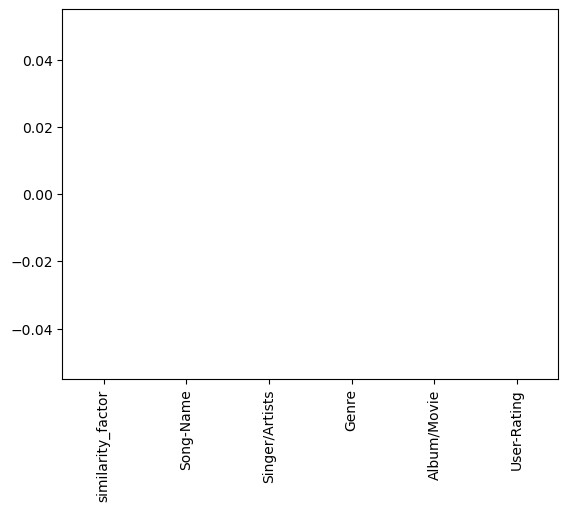

In [14]:
#  counts the number of remaining missing values in each column, creates a bar plot of these counts, and then displays the plot
df.isnull().sum().plot.bar()
plt.show()

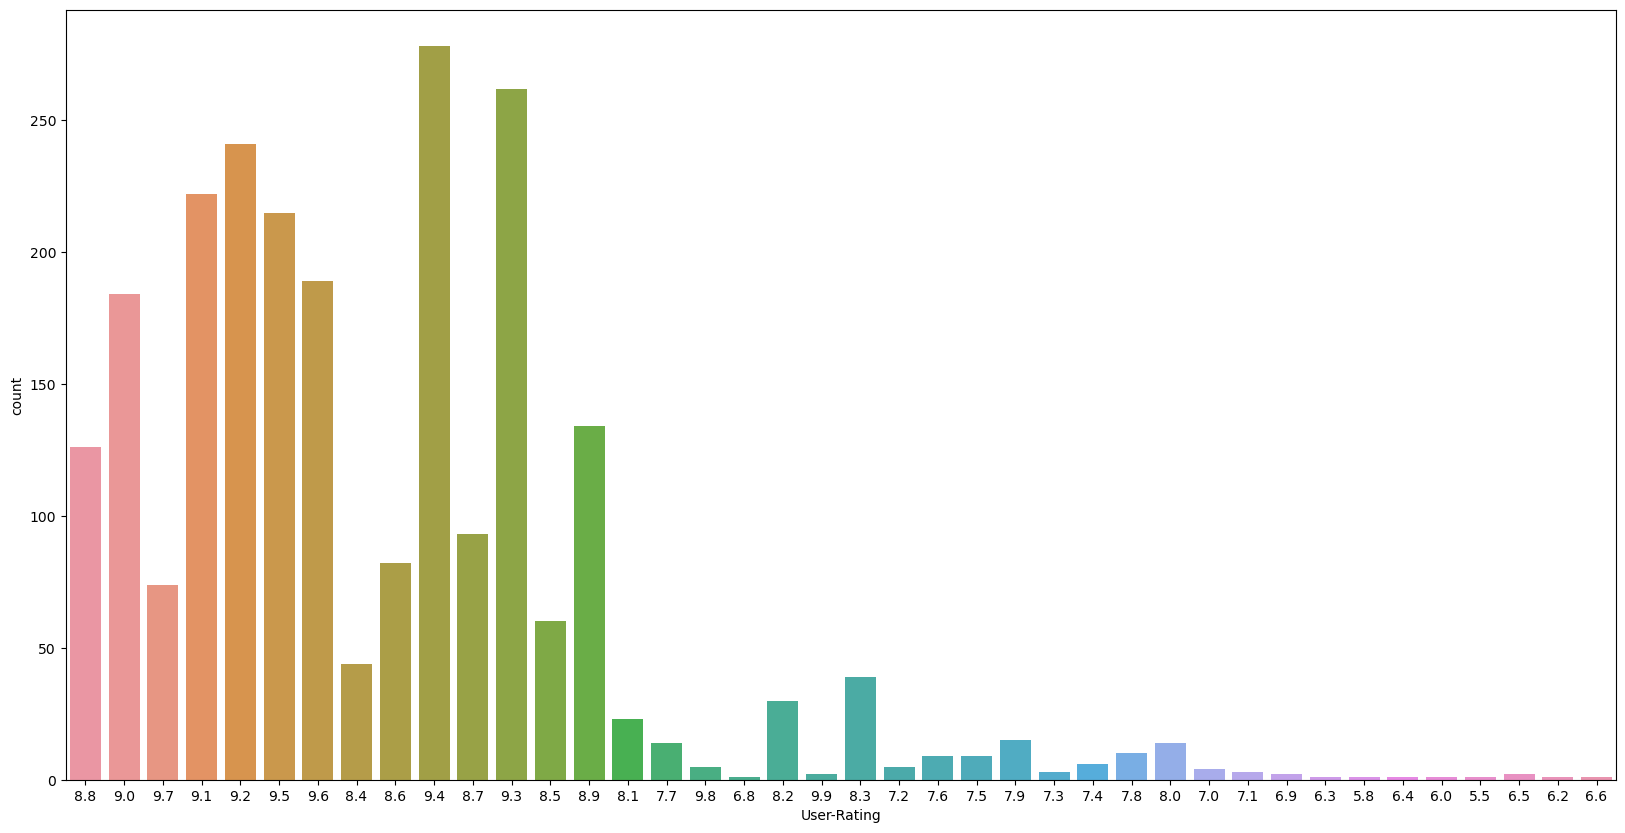

In [15]:
# Creating a figure with a specific size 20-width and 10-height
plt.figure(figsize=(20, 10))                

# Creating a count plot with explicit keyword arguments
sb.countplot(x=df['User-Rating'])

# Turning off the axis
# plt.axis('off')

# Showing the plot
plt.show()

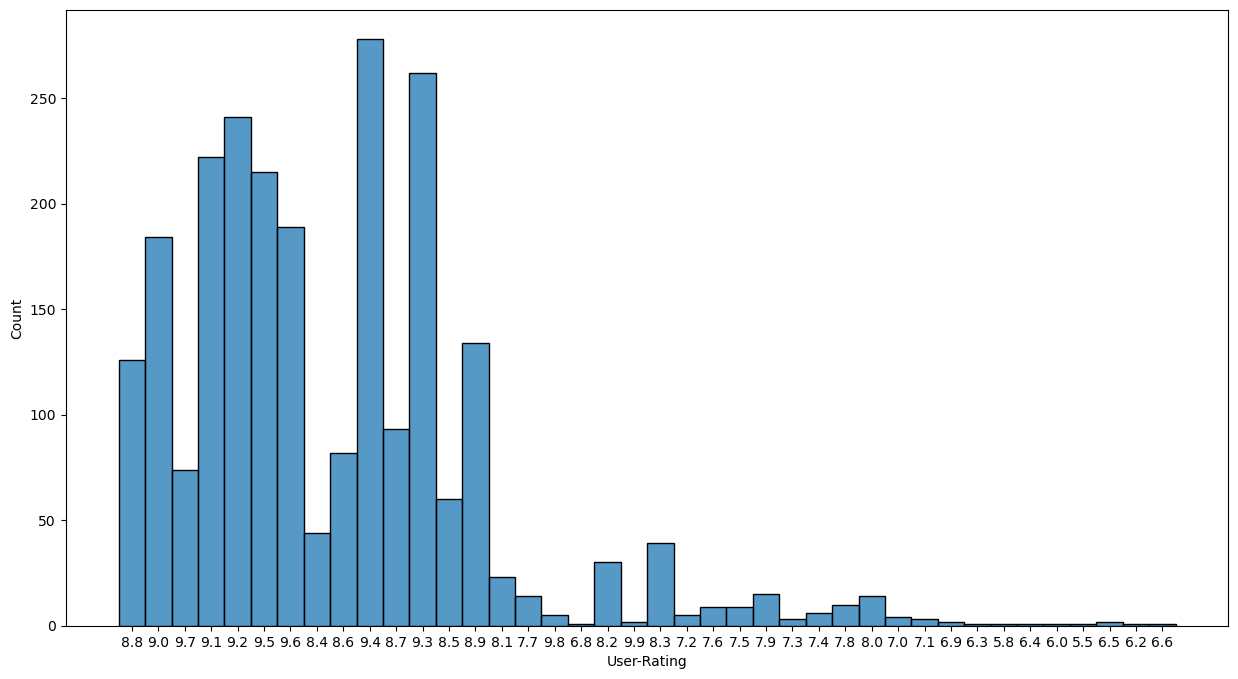

In [16]:
#  Create a figure and axes with specified size
plt.subplots(figsize=(15,8))

# Plot the histogram with increased height and width
sb.histplot(x='User-Rating', data=df)

# Display the plot
plt.show()

In [17]:
# sort in descending order by user rating value and show the top 1000 by head 
df = df.sort_values(by=['User-Rating'], ascending=False).head(10000)
df


,similarity_factor,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
158,159,Soorma Anthem,Shankar Mahadevan,BollywoodMotivational,Soorma,9.9
124,125,Ishq Di Baajiyan,Diljit Dosanjh,BollywoodRomantic,Soorma,9.9
2185,2186,Tere Ishq Ka Suroor,"Aaman Trikha, Akshata Dixit",BollywoodRomantic,Single,9.8
1401,1402,Saawali Si Raat,Arijit Singh,BollywoodRomantic,Barfi,9.8
114,115,Sawarne Lage,Jubin Nautiyal,BollywoodRomantic,Mitron,9.8
...,...,...,...,...,...,...
2017,2018,Farrata,"Adityan, Armaan Malik",BollywoodDance,Tumhari Sulu,6.3
2415,2416,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2
2401,2402,Phir Nahin Aane Wali Pyare,"Asha Bhosle, Manna Dey",BollywoodDance,Shola Aur Shabnam,6.0
2299,2300,Danka Bajega,Aaman Trikha,BollywoodDance,Khel To Abb Shuru Hoga,5.8


In [18]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(df['Genre'])

In [19]:
def get_similarities(song_name, dt):
   
  text_array1 = song_vectorizer.transform(dt[dt['Song-Name']==song_name]['Genre']).toarray()
  num_array1 = dt[dt['Song-Name']==song_name].select_dtypes(include=np.number).to_numpy()
   
  similar = []
  for idx, row in dt.iterrows():
    name = row['Song-Name']
     
    text_array2 = song_vectorizer.transform(dt[dt['Song-Name']==name]['Genre']).toarray()
    num_array2 = dt[dt['Song-Name']==name].select_dtypes(include=np.number).to_numpy()
 
    text_similar = cosine_similarity(text_array1, text_array2)[0][0]
    num_similar = cosine_similarity(num_array1, num_array2)[0][0]
    similar.append(text_similar + num_similar)
     
  return similar

In [20]:
def recommend_songs(song_name, dt=df):
  if df[df['Song-Name'] == song_name].shape[0] == 0:
    print('This song is not available in your wishlist')
     
    for song in dt.sample(n=5)['Song-Name'].values:
      print(song)
    return
   
  dt['similarity_factor'] = get_similarities(song_name, dt)
 
  dt.sort_values(by=['similarity_factor', 'User-Rating'],
                   ascending = [False, False],
                   inplace=True)

  display(dt[['Song-Name', 'Singer/Artists']][2:7])

In [21]:
recommend_songs('Tum hi ho')

This song is not available in your wishlist
Bulleya
Tay Hai
Hip Hip Huraah
Meri Wafayen Yaad Karoge
Yeh Hawa Yeh Bata


In [23]:
recommend_songs('Roobaroo')

,Song-Name,Singer/Artists
2184,Yaaron Aesa Hai,Salim Merchant
1037,Main Aisa Kyun Hoon,Shaan
1038,Main Aisa Kyon Hoon,Shaan
2246,Gaaye Jaa (Male),Mohammed Irfan
900,Roobaroo,"A.R. Rahman, Naresh Iyer"
